<a href="https://colab.research.google.com/github/Pagadsai/Leaf-Disease/blob/main/plantdiseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! nvidia-smi

Fri Dec  6 14:01:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
tf.__version__

'2.17.1'

In [ ]:
#import the libraries as shown

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

#from keras.applications.vgg16 import VGG16

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [ ]:
#re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/train'
valid_path = '/content/drive/MyDrive/valid'

In [ ]:
#import the inception V3 library as shown below and add preprocessing layer to the front of VGG
#Here we will be using imagenet weights

inception= InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/plant/plantdiseases/Newplantdiseasesdataset/Newplantdiseasesdataset/train/*')

In [ ]:
folders

['/content/drive/MyDrive/plant/plantdiseases/Newplantdiseasesdataset/Newplantdiseasesdataset/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/plant/plantdiseases/Newplantdiseasesdataset/Newplantdiseasesdataset/train/Tomato___Late_blight',
 '/content/drive/MyDrive/plant/plantdiseases/Newplantdiseasesdataset/Newplantdiseasesdataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/plant/plantdiseases/Newplantdiseasesdataset/Newplantdiseasesdataset/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/plant/plantdiseases/Newplantdiseasesdataset/Newplantdiseasesdataset/train/Tomato___Early_blight',
 '/content/drive/MyDrive/plant/plantdiseases/Newplantdiseasesdataset/Newplantdiseasesdataset/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/plant/plantdiseases/Newplantdiseasesdataset/Newplantdiseasesdataset/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/plant/plantdiseases/Newplantdiseasesdataset/Newplantdiseasesdataset/train/To

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a project model
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, 111, 111, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_94    │ (None, 111, 111, 32)   │             96 │ conv2d_94[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 111, 111, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_95 (Conv2D)        │ (None, 109, 109, 32)   │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_95    │ (None, 109, 109, 32)   │             96 │ conv2d_95[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 109, 109, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_96 (Conv2D)        │ (None, 109, 109, 64)   │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_96    │ (None, 109, 109, 64)   │            192 │ conv2d_96[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 109, 109, 64)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 54, 54, 64)     │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_97 (Conv2D)        │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, 54, 54, 80)     │            240 │ conv2d_97[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 54, 54, 80)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_98 (Conv2D)   

 Total params: 22,314,794 (85.12 MB)

 Trainable params: 512,010 (1.95 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

# tell the model what cost and optoimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
#use the image data generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/plant/plantdiseases/Newplantdiseasesdataset/Newplantdiseasesdataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 18366 images belonging to 10 classes.


In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/plant/plantdiseases/Newplantdiseasesdataset/Newplantdiseasesdataset/valid',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 4608 images belonging to 10 classes.


In [ ]:
# fit the cell
# run the cell. it will take some time to execute
r = model.fit(
    training_set,
    epochs=10,  # Replace with the desired number of epochs
    steps_per_epoch=len(training_set)
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


288/288 ━━━━━━━━━━━━━━━━━━━━ 3440s 12s/step - accuracy: 0.4591 - loss: 6.9994
Epoch 2/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 97us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


288/288 ━━━━━━━━━━━━━━━━━━━━ 77s 262ms/step - accuracy: 0.7011 - loss: 3.3216
Epoch 4/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 37us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 76s 258ms/step - accuracy: 0.7490 - loss: 3.1646
Epoch 6/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 59us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 80s 253ms/step - accuracy: 0.7941 - loss: 2.5753
Epoch 8/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 40us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 83s 258ms/step - accuracy: 0.7932 - loss: 2.9448
Epoch 10/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 31us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [ ]:
import matplotlib.pyplot as plt

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5061 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.6878
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5322 - loss: 0.6882 - val_accuracy: 0.5550 - val_loss: 0.6939
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5822 - loss: 0.6797 - val_accuracy: 0.5300 - val_loss: 0.6910
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5808 - loss: 0.6760 - val_accuracy: 0.5550 - val_loss: 0.6953
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5801 - loss: 0.6780 - val_accuracy: 0.5400 - val_loss: 0.6962
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5764 - loss: 0.6791 - val_accuracy: 0.5050 - val_loss: 0.7124
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6113 - loss: 0.6672 - val_accuracy: 0.5350 - val_loss: 0.7059
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5829 - loss: 0.6697 - val_accuracy: 0.5350 - val_loss: 0.7030
Epo

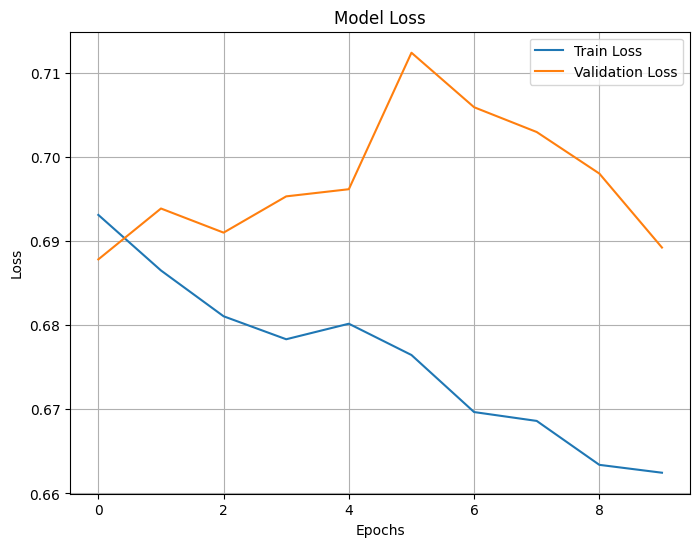

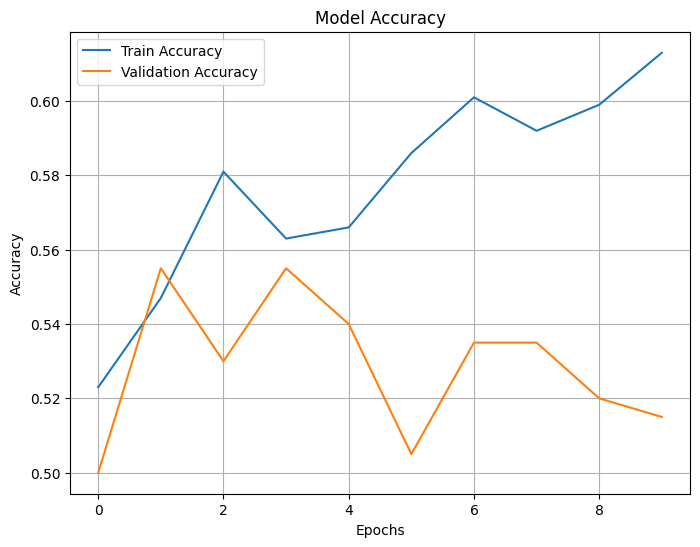

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example data (replace with your actual data)
X_train = np.random.rand(1000, 20)  # 1000 samples, 20 features
y_train = np.random.randint(0, 2, (1000, 1))  # Binary classification
X_val = np.random.rand(200, 20)  # 200 samples, 20 features
y_val = np.random.randint(0, 2, (200, 1))  # Binary classification

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example data (replace with your actual data)
X_train = np.random.rand(1000, 20)  # 1000 samples, 20 features
y_train = np.random.randint(0, 2, (1000, 1))  # Binary classification
X_val = np.random.rand(200, 20)  # 200 samples, 20 features
y_val = np.random.randint(0, 2, (200, 1))  # Binary classification

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

# Define valid_set
valid_set = X_val  # Use the validation feature data

# Make predictions
y_pred = model.predict(valid_set)

# Display predictions
print(y_pred)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5126 - loss: 0.6932 - val_accuracy: 0.5200 - val_loss: 0.6931
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5171 - loss: 0.6902 - val_accuracy: 0.5050 - val_loss: 0.6937
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5621 - loss: 0.6869 - val_accuracy: 0.4650 - val_loss: 0.6957
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5684 - loss: 0.6777 - val_accuracy: 0.5300 - val_loss: 0.6932
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5712 - loss: 0.6815 - val_accuracy: 0.5150 - val_loss: 0.6978
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5555 - loss: 0.6731 - val_accuracy: 0.5200 - val_loss: 0.6977
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5658 - loss: 0.6798 - val_accuracy: 0.5000 - val_loss: 0.7033
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5898 - loss: 0.6702 - val_accuracy: 0.5350 - val_loss:

In [ ]:
y_pred

array([[0.64393514],
       [0.54871166],
       [0.5681566 ],
       [0.5517827 ],
       [0.69581264],
       [0.65156037],
       [0.6918991 ],
       [0.528374  ],
       [0.49790072],
       [0.607131  ],
       [0.442817  ],
       [0.5235016 ],
       [0.52434266],
       [0.5460398 ],
       [0.60582674],
       [0.5165924 ],
       [0.53723466],
       [0.5841928 ],
       [0.49687368],
       [0.6471017 ],
       [0.63133067],
       [0.614599  ],
       [0.4870235 ],
       [0.637817  ],
       [0.5812543 ],
       [0.46856725],
       [0.63814574],
       [0.5094085 ],
       [0.43074718],
       [0.5806307 ],
       [0.49535692],
       [0.6312302 ],
       [0.62115264],
       [0.6733003 ],
       [0.4992249 ],
       [0.566734  ],
       [0.4846814 ],
       [0.5557957 ],
       [0.57104003],
       [0.5176154 ],
       [0.61306834],
       [0.5588819 ],
       [0.57709783],
       [0.62085485],
       [0.64286447],
       [0.508625  ],
       [0.6255842 ],
       [0.579

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_inception.h5') # Load the InceptionV3 model you saved previously.

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the path to your image
img_path = '/correct/path_to_your_image.jpg'  # Replace with your actual path

# Check if the file exists
import numpy as np
height, width = 256, 256
img_data = np.zeros((height, width, 3), dtype=np.float32)
print(img_data.shape)  # Output: (256, 256, 3)

if os.path.exists(img_path):
    try:
        # Load and resize the image to 224x224
        img = load_img(img_path, target_size=(224, 224))

        # Convert the image to a NumPy array
        img_data = img_to_array(img)

        # Normalize pixel values to [0, 1]
        img_data /= 255.0

        # Add a batch dimension (1, 224, 224, 3)
        img_data = tf.expand_dims(img_data, axis=0)

        # Print the shape to verify everything is okay
        print("Image loaded and processed successfully.")
        print(img_data.shape)

    except Exception as e:
        print(f"Error loading or processing the image: {e}")
else:
    print(f"FileNotFoundError: Image not found at {img_path}")


(256, 256, 3)
FileNotFoundError: Image not found at /correct/path_to_your_image.jpg


In [ ]:
# Check if img_data exists in the environment
try:
    print(img_data.shape)
except NameError:
    print("img_data has not been defined.")


(256, 256, 3)


In [ ]:
img_data

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
import os
from tensorflow.keras.preprocessing import image

# Assuming you're working in Google Colab
google_drive_base_path = '/content/drive/MyDrive/'  # Adjust if necessary
image_dir = os.path.join(google_drive_base_path, 'plant/plantdiseases/Newplantdiseasesdataset/Newplantdiseasesdataset/train/Tomato___Bacterial_spot')  # Path to the directory

# Get a list of image files in the directory
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Check if there are any images in the directory
if image_files:
    # Load the first image in the directory (you can change this to load other images)
    image_path = os.path.join(image_dir, image_files[0])
    img = image.load_img(image_path, target_size=(224, 224))
    print("Image loaded successfully.")
else:
    print(f"No image files found in directory: {image_dir}")

Image loaded successfully.


In [ ]:
x=image.img_to_array(img)
x

array([[[128., 116., 116.],
        [130., 118., 118.],
        [130., 118., 118.],
        ...,
        [160., 154., 154.],
        [165., 159., 159.],
        [160., 154., 154.]],

       [[126., 114., 114.],
        [129., 117., 117.],
        [132., 120., 120.],
        ...,
        [159., 153., 153.],
        [163., 157., 157.],
        [160., 154., 154.]],

       [[128., 116., 116.],
        [130., 118., 118.],
        [133., 121., 121.],
        ...,
        [156., 150., 150.],
        [157., 151., 151.],
        [158., 152., 152.]],

       ...,

       [[120., 114., 118.],
        [120., 114., 118.],
        [110., 104., 108.],
        ...,
        [157., 152., 156.],
        [166., 161., 165.],
        [164., 159., 163.]],

       [[131., 125., 129.],
        [133., 127., 131.],
        [124., 118., 122.],
        ...,
        [155., 150., 154.],
        [162., 157., 161.],
        [161., 156., 160.]],

       [[140., 134., 138.],
        [131., 125., 129.],
        [138., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Specify the correct path to your image file
image_path = '/content/drive/MyDrive/plant/plantdiseases/Newplantdiseasesdataset/Newplantdiseasesdataset/train/Tomato___Bacterial_spot' # Replace this with the actual file path to your image

try:
    # Load the image
    img = load_img(image_path, target_size=(224, 224))  # Resize image to (224, 224) for ResNet50

    # Convert the image to a numpy array
    x = img_to_array(img)  # Shape: (224, 224, 3)

    # Expand dimensions to add a batch dimension
    x = np.expand_dims(x, axis=0)  # Shape: (1, 224, 224, 3)

    # Preprocess the image for ResNet50
    img_data = preprocess_input(x)

    # Print the shape of the processed image
    print("Processed image shape:", img_data.shape)

    # Check the first few preprocessed pixel values
    print("Processed image data (first row):", img_data[0, 0, 0, :])  # Example data

except FileNotFoundError:
    print(f"File not found at the specified path: {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: [Errno 21] Is a directory: '/content/drive/MyDrive/plant/plantdiseases/Newplantdiseasesdataset/Newplantdiseasesdataset/train/Tomato___Bacterial_spot'


In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 1, 1, 224, 224, 3)

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

# Load the InceptionV3 model
model_inception = load_model('model_inception.h5')

# Define the path to the directory containing images
image_dir = '/content/drive/MyDrive/plant/plantdiseases/Newplantdiseasesdataset/Newplantdiseasesdataset/train/Tomato___Bacterial_spot'

# Get a list of image files in the directory
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Check if there are any images in the directory
if image_files:
    # Load the first image in the directory (you can loop through all images if needed)
    image_path = os.path.join(image_dir, image_files[0])

    try:
        # Load and preprocess the image
        img = load_img(image_path, target_size=(224, 224))
        x = img_to_array(img)

        # Normalize pixel values to [0, 1]
        x = x / 255.0

        # If your model expects a flattened shape (1, 20) for some reason, reshape it
        # Here, we're reshaping only if required by your model's specifications
        if x.shape == (224, 224, 3):
            x = x.flatten()  # Flatten to 1-dimensional array
            x = np.expand_dims(x, axis=0)  # Convert it back to batch dimension (1, 20)

        else:
            x = np.expand_dims(x, axis=0)  # Keep the shape as (1, 224, 224, 3)

        # Make predictions using the InceptionV3 model
        predictions = model_inception.predict(x)

        # Get the class index with the highest probability
        predicted_class_index = np.argmax(predictions[0])

        # Print the class index and its probability
        print(f"Predicted class index: {predicted_class_index}")
        print(f"Probability of the predicted class: {predictions[0][predicted_class_index]}")

    except Exception as e:
        print(f"An error occurred while processing the image: {e}")

else:
    print(f"No image files found in directory: {image_dir}")

An error occurred while processing the image: Exception encountered when calling Sequential.call().

Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 20, but received input with shape (1, 150528)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 150528), dtype=float32)
  • training=False
  • mask=None


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess the image
img = load_img(image_path, target_size=(224, 224))
img_data = img_to_array(img)

# Normalize pixel values to [0, 1]
img_data = img_data / 255.0

# Add the batch dimension to the input tensor
img_data = np.expand_dims(img_data, axis=0)

print(f"Shape of img_data after adding batch dimension: {img_data.shape}")


Shape of img_data after adding batch dimension: (1, 224, 224, 3)


In [ ]:
print(f"Shape of img_data before predicting: {img_data.shape}")


Shape of img_data before predicting: (1, 224, 224, 3)


In [ ]:
# Ensure input data has a batch dimension
img_data = np.expand_dims(img_data, axis=0)
print(f"Shape of img_data after reshaping: {img_data.shape}")


Shape of img_data after reshaping: (1, 1, 224, 224, 3)


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,011 (43.02 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.17.1'